# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The NSL_SIMULATOR code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progressive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B \langle T \rangle + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

In [30]:
#Importo tutte le librerie necessarie

import numpy as np # Libreria per la manipolazione di array e calcoli matematici
import pandas as pd # Libreria per la manipolazione e l'analisi di dati
import matplotlib.pyplot as plt  # Libreria per la creazione di grafici

In [31]:
#Figure più leggibili

# Imposto le dimensioni del titolo dell'asse
plt.rcParams['axes.titlesize'] = 16

# Imposto le dimensioni delle etichette dell'asse
plt.rcParams['axes.labelsize'] = 14

# Imposto le dimensioni della legenda
plt.rcParams['legend.fontsize'] = 12

# Imposto le dimensioni dei tick sull'asse x
plt.rcParams['xtick.labelsize'] = 12

# Imposto le dimensioni dei tick sull'asse y
plt.rcParams['ytick.labelsize'] = 12

# Disabilito le linee del bordo destro degli assi
plt.rcParams['axes.spines.right'] = False

# Disabilito le linee del bordo superiore degli assi
plt.rcParams['axes.spines.top'] = False

# Imposto la griglia
plt.rcParams['axes.grid'] = True

In [162]:
# Carico i dati dai file e li converto in array NumPy
dati_temp_sol = np.array(pd.read_csv("OUTPUT/temperature.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK:", "ACTUAL_KE:", "KE_AVE:", "ERROR:"]))
dati_tot_sol = np.array(pd.read_csv("OUTPUT/total_energy.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK:", "ACTUAL_KE:", "KE_AVE:", "ERROR:"]))
dati_pot_sol = np.array(pd.read_csv("OUTPUT/potential_energy.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK:", "ACTUAL_KE:", "KE_AVE:", "ERROR:"]))
dati_cin_sol = np.array(pd.read_csv("OUTPUT/kinetic_energy.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK:", "ACTUAL_KE:", "KE_AVE:", "ERROR:"]))
dati_press_sol = np.array(pd.read_csv("OUTPUT/pressure.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK:", "ACTUAL_KE:", "KE_AVE:", "ERROR:"]))

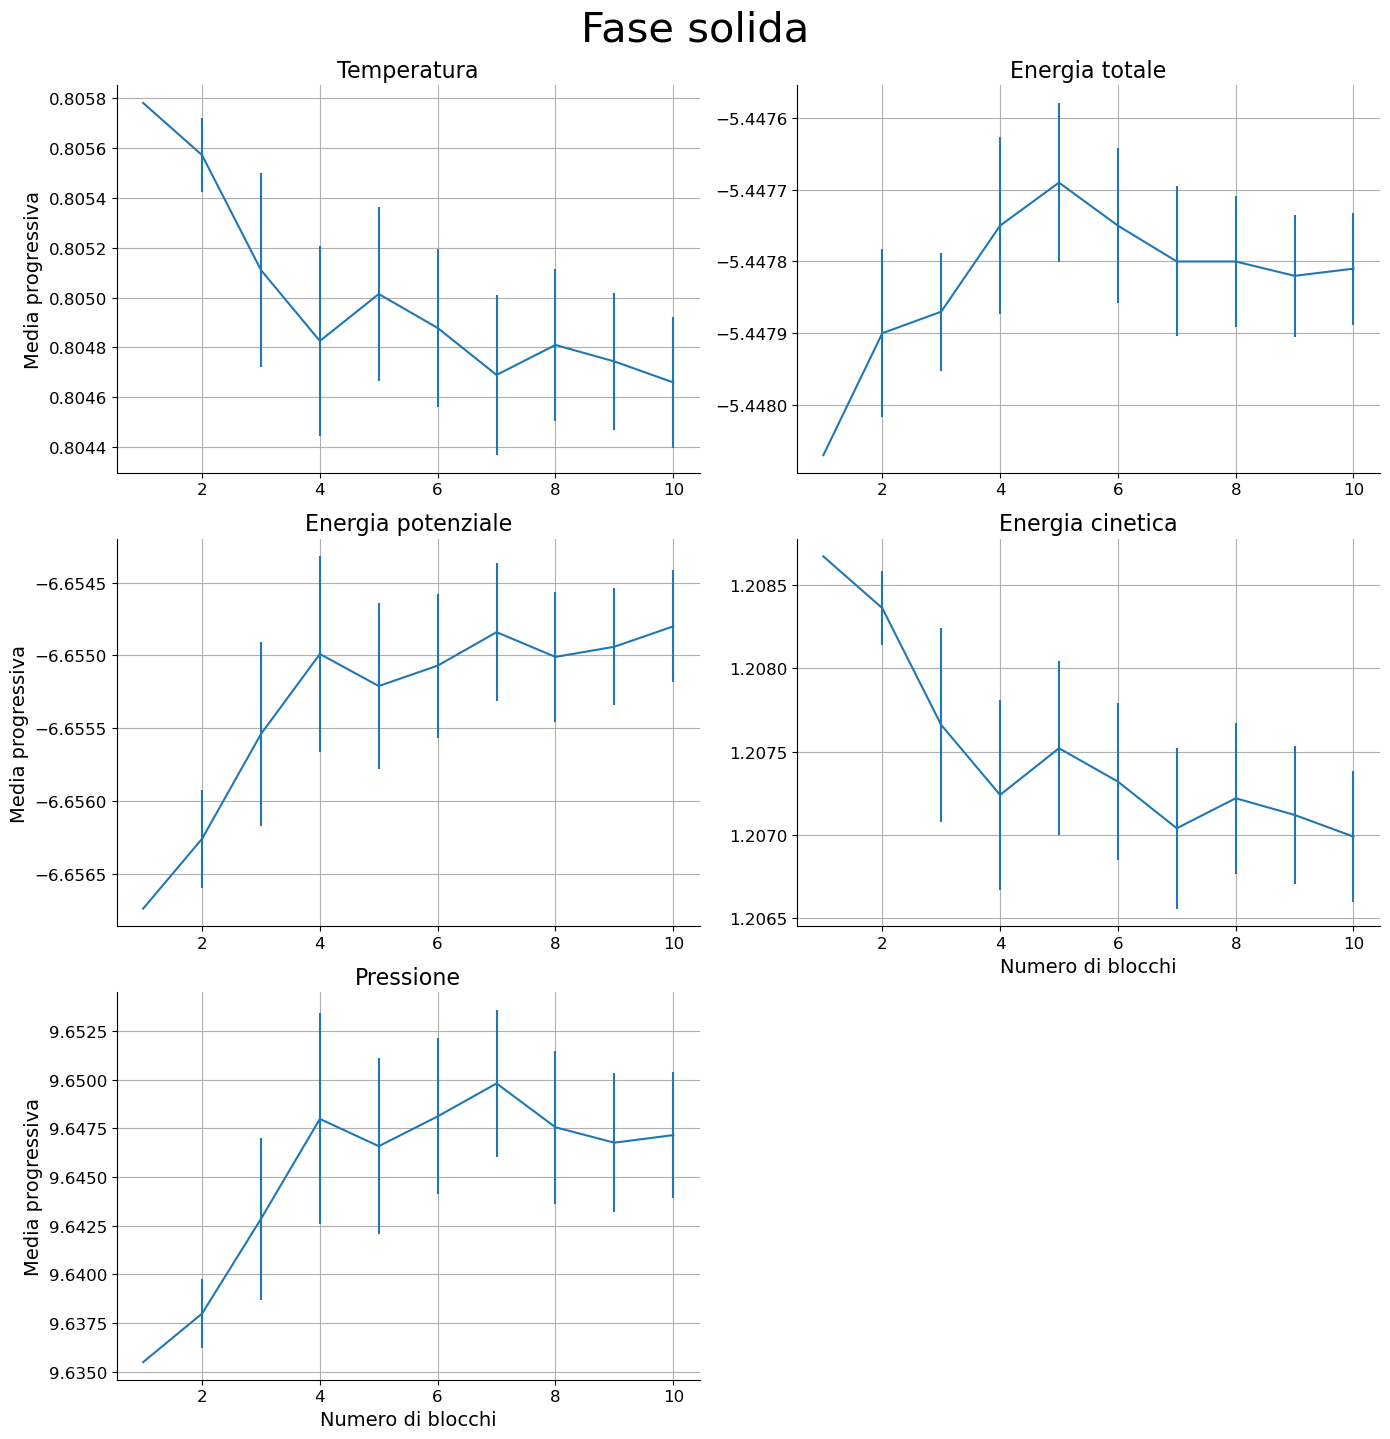

In [163]:
# Creo una figura con 5 subplots per le diverse grandezze
fig, axx = plt.subplots(3, 2, figsize = (14,14))

# Creo i grafici a barre con errori
axx[0,0].errorbar(dati_temp_sol[:,0], dati_temp_sol[:,2], yerr = dati_temp_sol[:,3])
axx[0,1].errorbar(dati_tot_sol[:,0], dati_tot_sol[:,2], yerr = dati_tot_sol[:,3])
axx[1,0].errorbar(dati_pot_sol[:,0], dati_pot_sol[:,2], yerr = dati_pot_sol[:,3])
axx[1,1].errorbar(dati_cin_sol[:,0], dati_cin_sol[:,2], yerr = dati_cin_sol[:,3])
axx[2,0].errorbar(dati_press_sol[:,0], dati_press_sol[:,2], yerr = dati_press_sol[:,3])

# Etichette degli assi
axx[0,0].set_ylabel('Media progressiva')

axx[1,0].set_ylabel('Media progressiva')

axx[1,1].set_xlabel('Numero di blocchi')

axx[2,0].set_xlabel('Numero di blocchi')
axx[2,0].set_ylabel('Media progressiva')

# Titolo
axx[0,0].set_title("Temperatura")
axx[0,1].set_title("Energia totale")
axx[1,0].set_title("Energia potenziale")
axx[1,1].set_title("Energia cinetica")
axx[2,0].set_title("Pressione")

# Rimuovo l'ultimo subplot vuoto
fig.delaxes(axx[2,1])

# Ottimizzo lo spaziamento tra i plot
plt.tight_layout()

# Aggiungo il titolo alla figura
fig.suptitle('Fase solida', fontsize = 30, y = 1.025)

# Mostro il grafico
plt.show()

In [164]:
# Carico i dati dai file e li converto in array NumPy
dati_temp_liq = np.array(pd.read_csv("OUTPUT/temperature.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK:", "ACTUAL_KE:", "KE_AVE:", "ERROR:"]))
dati_tot_liq  = np.array(pd.read_csv("OUTPUT/total_energy.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK:", "ACTUAL_KE:", "KE_AVE:", "ERROR:"]))
dati_pot_liq  = np.array(pd.read_csv("OUTPUT/potential_energy.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK:", "ACTUAL_KE:", "KE_AVE:", "ERROR:"]))
dati_cin_liq  = np.array(pd.read_csv("OUTPUT/kinetic_energy.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK:", "ACTUAL_KE:", "KE_AVE:", "ERROR:"]))
dati_press_liq  = np.array(pd.read_csv("OUTPUT/pressure.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK:", "ACTUAL_KE:", "KE_AVE:", "ERROR:"]))

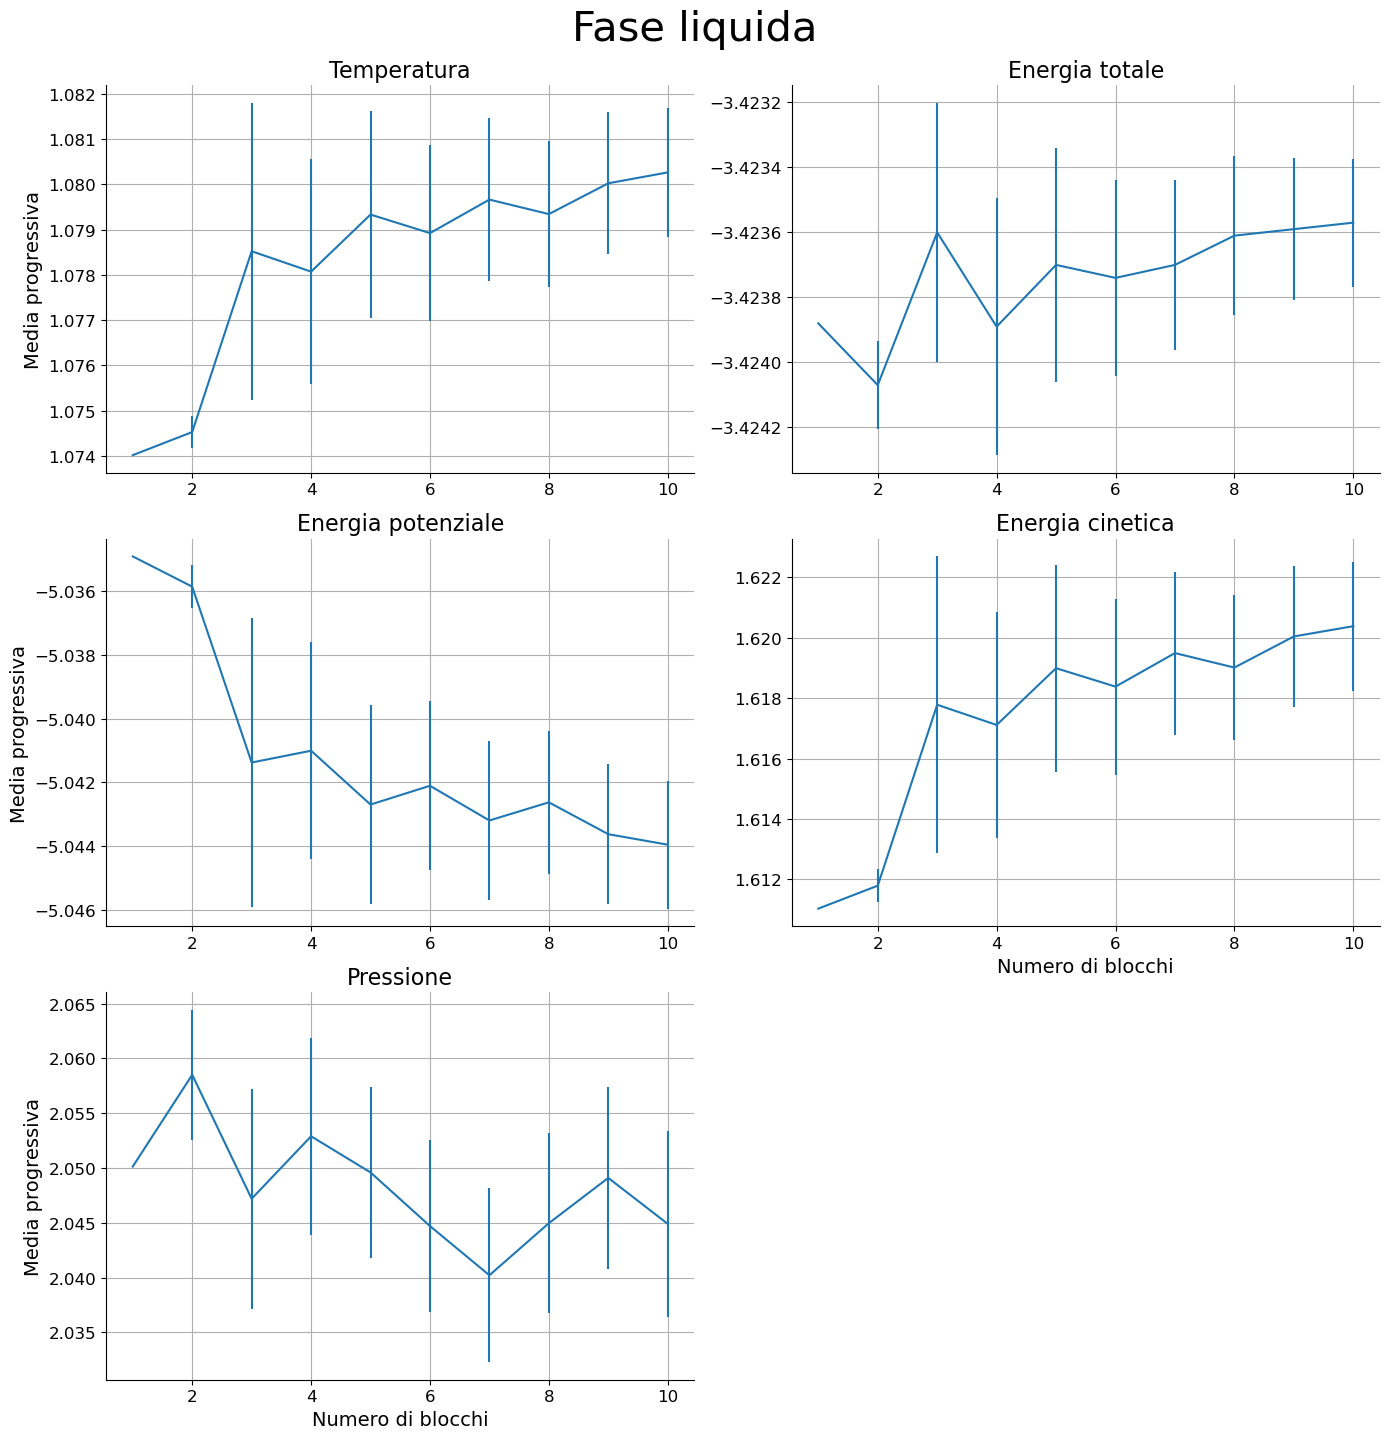

In [165]:
# Creo una figura con 5 subplots per le diverse grandezze
fig, axx = plt.subplots(3, 2, figsize = (14,14))

# Creo i grafici a barre con errori
axx[0,0].errorbar(dati_temp_liq [:,0], dati_temp_liq [:,2], yerr = dati_temp_liq [:,3])
axx[0,1].errorbar(dati_tot_liq [:,0], dati_tot_liq [:,2], yerr = dati_tot_liq [:,3])
axx[1,0].errorbar(dati_pot_liq [:,0], dati_pot_liq [:,2], yerr = dati_pot_liq [:,3])
axx[1,1].errorbar(dati_cin_liq [:,0], dati_cin_liq [:,2], yerr = dati_cin_liq [:,3])
axx[2,0].errorbar(dati_press_liq [:,0], dati_press_liq [:,2], yerr = dati_press_liq [:,3])

# Etichette degli assi
axx[0,0].set_ylabel('Media progressiva')

axx[1,0].set_ylabel('Media progressiva')

axx[1,1].set_xlabel('Numero di blocchi')

axx[2,0].set_xlabel('Numero di blocchi')
axx[2,0].set_ylabel('Media progressiva')

# Titolo
axx[0,0].set_title("Temperatura")
axx[0,1].set_title("Energia totale")
axx[1,0].set_title("Energia potenziale")
axx[1,1].set_title("Energia cinetica")
axx[2,0].set_title("Pressione")

# Rimuovo l'ultimo subplot vuoto
fig.delaxes(axx[2,1])

# Ottimizzo lo spaziamento tra i plot
plt.tight_layout()

# Aggiungo il titolo alla figura
fig.suptitle('Fase liquida', fontsize = 30, y = 1.025)

# Mostro il grafico
plt.show()

In [150]:
# Carico i dati dai file e li converto in array NumPy
dati_temp_gas = np.array(pd.read_csv("OUTPUT/temperature.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK:", "ACTUAL_KE:", "KE_AVE:", "ERROR:"]))
dati_tot_gas = np.array(pd.read_csv("OUTPUT/total_energy.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK:", "ACTUAL_KE:", "KE_AVE:", "ERROR:"]))
dati_pot_gas = np.array(pd.read_csv("OUTPUT/potential_energy.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK:", "ACTUAL_KE:", "KE_AVE:", "ERROR:"]))
dati_cin_gas = np.array(pd.read_csv("OUTPUT/kinetic_energy.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK:", "ACTUAL_KE:", "KE_AVE:", "ERROR:"]))
dati_press_gas = np.array(pd.read_csv("OUTPUT/pressure.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK:", "ACTUAL_KE:", "KE_AVE:", "ERROR:"]))

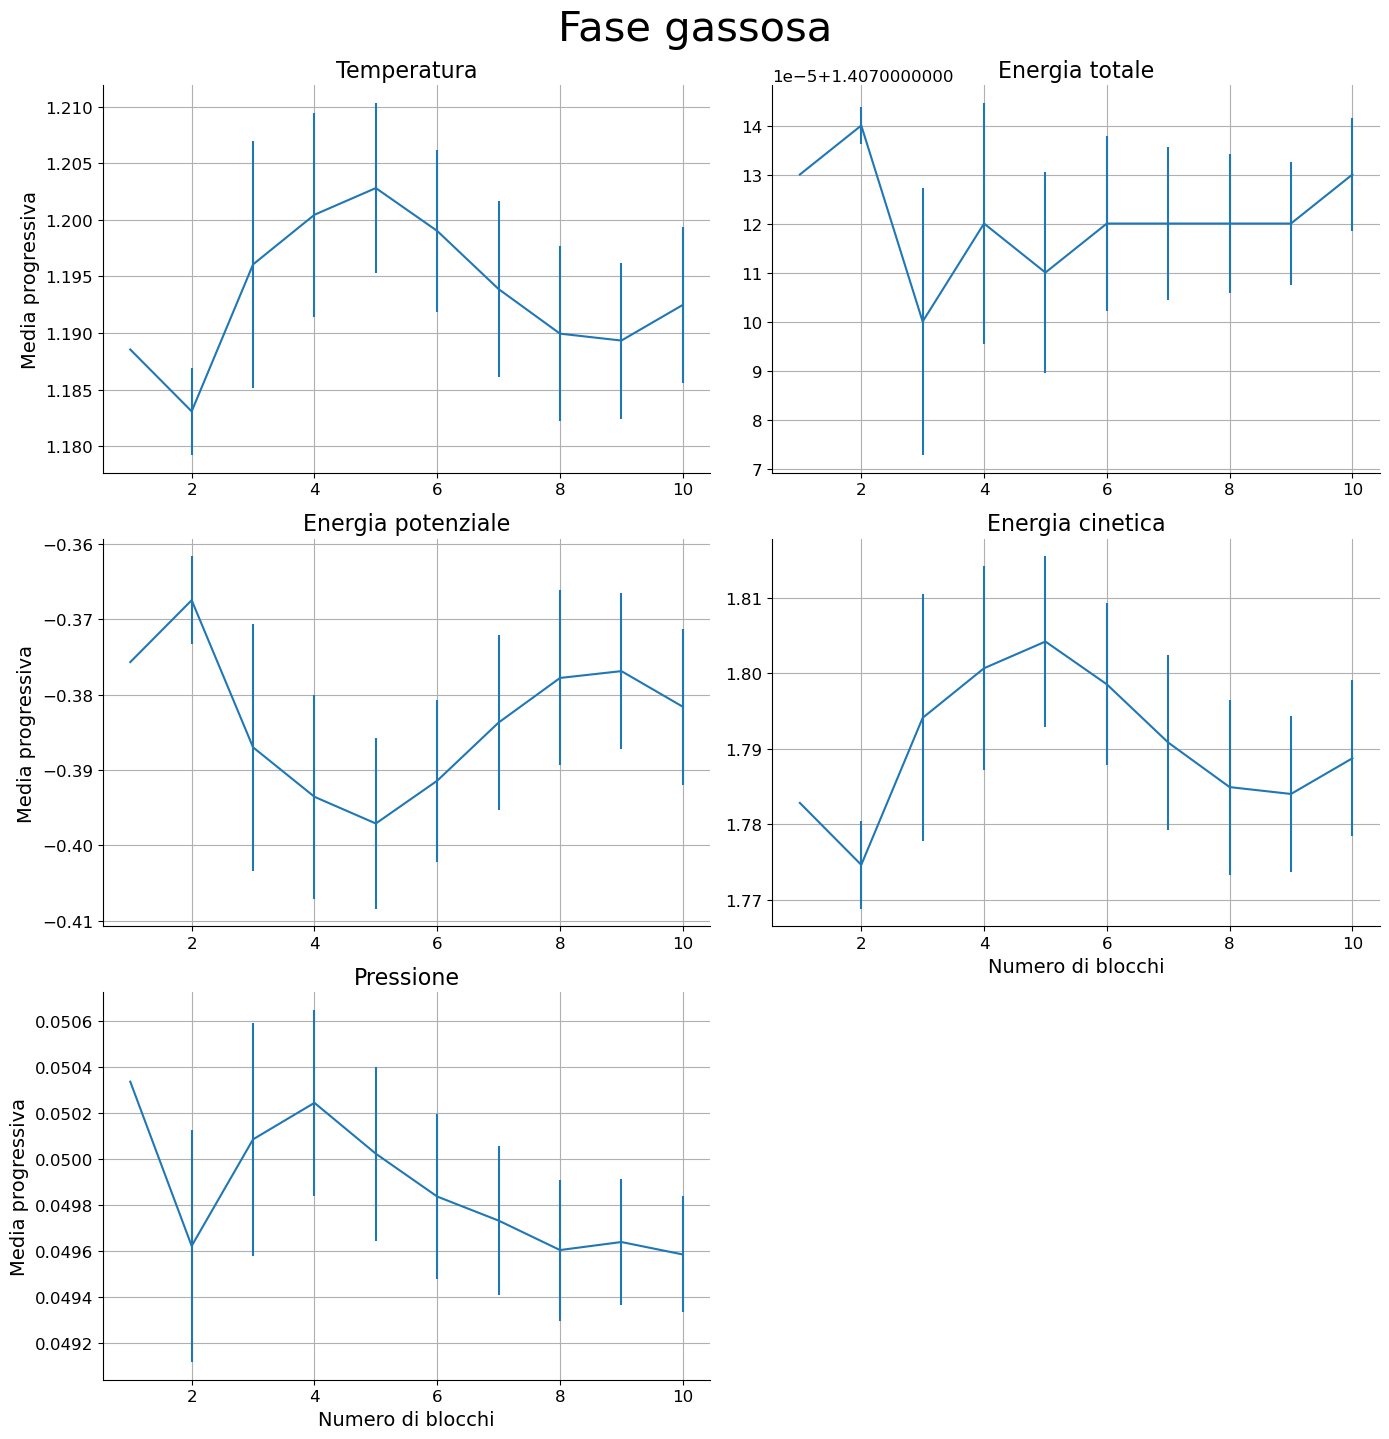

In [151]:
# Creo una figura con 5 subplots per le diverse grandezze
fig, axx = plt.subplots(3, 2, figsize = (14,14))

# Creo i grafici a barre con errori
axx[0,0].errorbar(dati_temp_gas [:,0], dati_temp_gas [:,2], yerr = dati_temp_gas [:,3])
axx[0,1].errorbar(dati_tot_gas [:,0], dati_tot_gas [:,2], yerr = dati_tot_gas [:,3])
axx[1,0].errorbar(dati_pot_gas [:,0], dati_pot_gas [:,2], yerr = dati_pot_gas [:,3])
axx[1,1].errorbar(dati_cin_gas [:,0], dati_cin_gas [:,2], yerr = dati_cin_gas [:,3])
axx[2,0].errorbar(dati_press_gas [:,0], dati_press_gas [:,2], yerr = dati_press_gas [:,3])

# Etichette degli assi
axx[0,0].set_ylabel('Media progressiva')

axx[1,0].set_ylabel('Media progressiva')

axx[1,1].set_xlabel('Numero di blocchi')

axx[2,0].set_xlabel('Numero di blocchi')
axx[2,0].set_ylabel('Media progressiva')

# Titolo
axx[0,0].set_title("Temperatura")
axx[0,1].set_title("Energia totale")
axx[1,0].set_title("Energia potenziale")
axx[1,1].set_title("Energia cinetica")
axx[2,0].set_title("Pressione")

# Rimuovo l'ultimo subplot vuoto
fig.delaxes(axx[2,1])

# Ottimizzo lo spaziamento tra i plot
plt.tight_layout()

# Aggiungo il titolo alla figura
fig.suptitle('Fase gassosa', fontsize = 30, y = 1.025)

# Mostro il grafico
plt.show()

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid/gas phase MD simulations by re-starting them after such equilibration time.</span>

Inizialmente $T$ non è conservata perchè la configurazione cristallina non è termodinamicamente stabile alla temperatura data, e dopo un certo tempo diverso per ogni fase, arriverà alla rispettiva temperatura di equilibrio.